# Data Exploration

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing csv
df = pd.read_csv("country_vaccinations_kick_off.csv")

In [5]:
# number of rows by columns
df.shape

(3208, 15)

In [3]:
# first 5 rows of dataset
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [8]:
# number of na values in each field
df.isna().sum()

country                                   0
iso_code                                256
date                                      0
total_vaccinations                     1124
people_vaccinated                      1481
people_fully_vaccinated                2114
daily_vaccinations_raw                 1473
daily_vaccinations                      125
total_vaccinations_per_hundred         1124
people_vaccinated_per_hundred          1481
people_fully_vaccinated_per_hundred    2114
daily_vaccinations_per_million          125
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [20]:
# summary statistics
df.describe().round() # round function used to remove scientific notation in output

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2084.0,1727.0,1094.0,1735.0,3083.0,2084.0,1727.0,1094.0,3083.0
mean,1360663.0,1139099.0,330955.0,72119.0,56198.0,5.0,5.0,2.0,2175.0
std,4460924.0,3706714.0,1189176.0,205473.0,173496.0,10.0,8.0,4.0,3712.0
min,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,27072.0,25358.0,6948.0,1888.0,1282.0,1.0,1.0,0.0,347.0
50%,169612.0,151737.0,28298.0,10559.0,6331.0,2.0,2.0,1.0,969.0
75%,704146.0,604582.0,161821.0,53707.0,29984.0,5.0,4.0,1.0,1822.0
max,52884356.0,38292270.0,14077440.0,2242472.0,1916190.0,77.0,47.0,30.0,30869.0


# Visualizations of daily trends by selected countries

In [147]:
def time_plot(df,feature,country):
    '''
    Plot time graphs according to a feature for certain countries
    '''
    
    plt.figure(figsize=(20,12))

    for i,country in enumerate(country):
        plt.subplot(2,4,i+1)
        data = df[df['country'] == country]
        sns.lineplot(x=data['date'] ,y=data[feature],label = feature)
        plt.tick_params(axis='x',which='both',top=False,bottom=False,labelbottom=False)

    plt.show()

**Trends of total_vaccinations for countries with highest total number of vaccines**

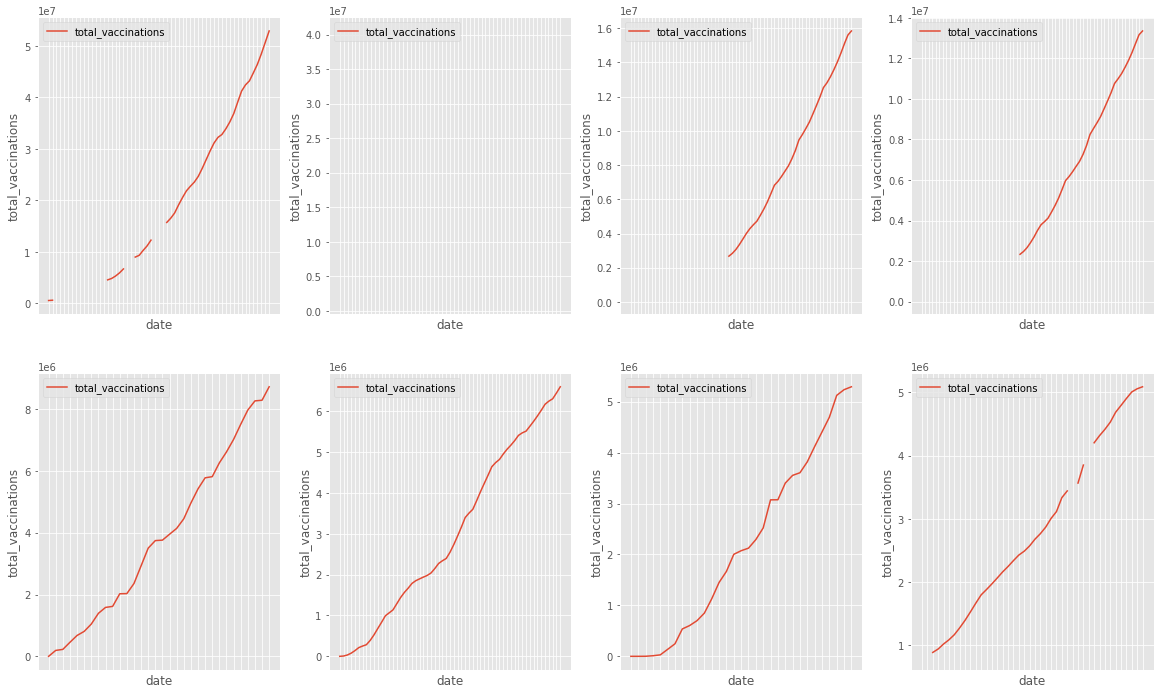

In [150]:
# # if desired, change the names of the list to the countries you want to plot
countries = ['United States','China','United Kingdom','England','India','Israel','Brazil','United Arab Emirates']

# plot of total_vaccinations for the countries above
time_plot(df,'total_vaccinations',countries)

**Trends of daily_vaccinations_raw for countries with highest total number of vaccines**

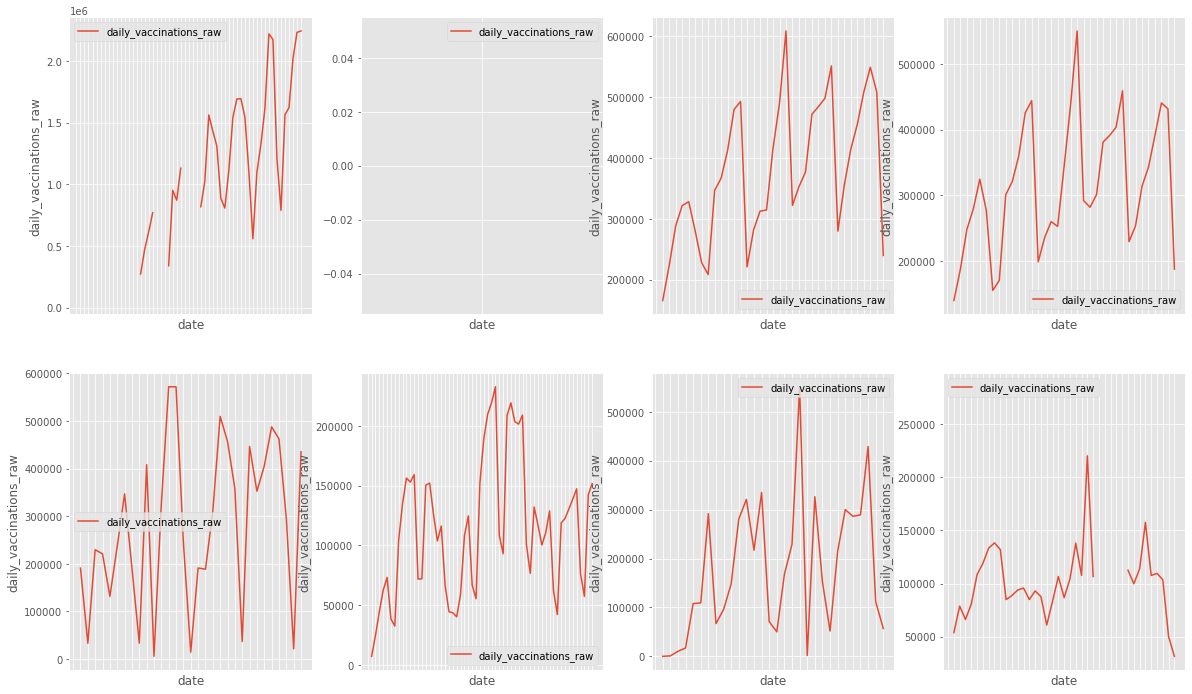

In [149]:
# if desired, change the names of the list to the countries you want to plot
countries = ['United States','China','United Kingdom','England','India','Israel','Brazil','United Arab Emirates']

# plot of daily_vaccinations_raw for the countries above
time_plot(df,'daily_vaccinations_raw',countries)

# Maximum values by country

Checking the maximum values of each field by country.

In [37]:
# group by country, then take maximum of each field, save to max_df
max_df = df.groupby(['country'])[['total_vaccinations','people_vaccinated','people_fully_vaccinated',
                        'daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred',
                        'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred',
                        'daily_vaccinations_per_million','vaccines']].max().reset_index()

In [38]:
# 90 countries in dataset (noted from having 90 rows in max_df)
max_df

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Albania,1127.0,689.0,438.0,78.0,82.0,0.04,0.02,0.02,28.0,Pfizer/BioNTech
1,Algeria,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V
2,Andorra,1291.0,1291.0,NaN,NaN,66.0,1.67,1.67,NaN,854.0,Pfizer/BioNTech
3,Anguilla,1341.0,1341.0,NaN,NaN,149.0,8.94,8.94,NaN,9932.0,Oxford/AstraZeneca
4,Argentina,609791.0,372181.0,237610.0,47456.0,19820.0,1.35,0.82,0.53,439.0,Sputnik V
...,...,...,...,...,...,...,...,...,...,...,...
85,Turks and Caicos Islands,6433.0,6433.0,NaN,NaN,222.0,16.62,16.62,NaN,5734.0,Pfizer/BioNTech
86,United Arab Emirates,5086835.0,836568.0,250000.0,284857.0,160020.0,51.43,8.46,2.53,16179.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
87,United Kingdom,15839781.0,15300151.0,539630.0,609010.0,445204.0,23.33,22.54,0.79,6558.0,"Oxford/AstraZeneca, Pfizer/BioNTech"
88,United States,52884356.0,38292270.0,14077440.0,2242472.0,1667631.0,15.81,11.45,4.21,4986.0,"Moderna, Pfizer/BioNTech"


### Total vaccinations by country

In [113]:
# top 25 countries with most amount of vaccinations
max_df.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False)[0:25]

country
United States           52884356.0
China                   40520000.0
United Kingdom          15839781.0
England                 13353631.0
India                    8720822.0
Israel                   6599799.0
Brazil                   5293979.0
United Arab Emirates     5086835.0
Turkey                   4182027.0
Germany                  4146348.0
Russia                   3900000.0
Italy                    3044535.0
France                   2896472.0
Spain                    2561608.0
Chile                    2147272.0
Poland                   2122245.0
Morocco                  1707091.0
Indonesia                1578720.0
Scotland                 1269691.0
Canada                   1258360.0
Romania                  1151112.0
Bangladesh               1132711.0
Serbia                    950871.0
Wales                     790211.0
Mexico                    749682.0
Name: total_vaccinations, dtype: float64

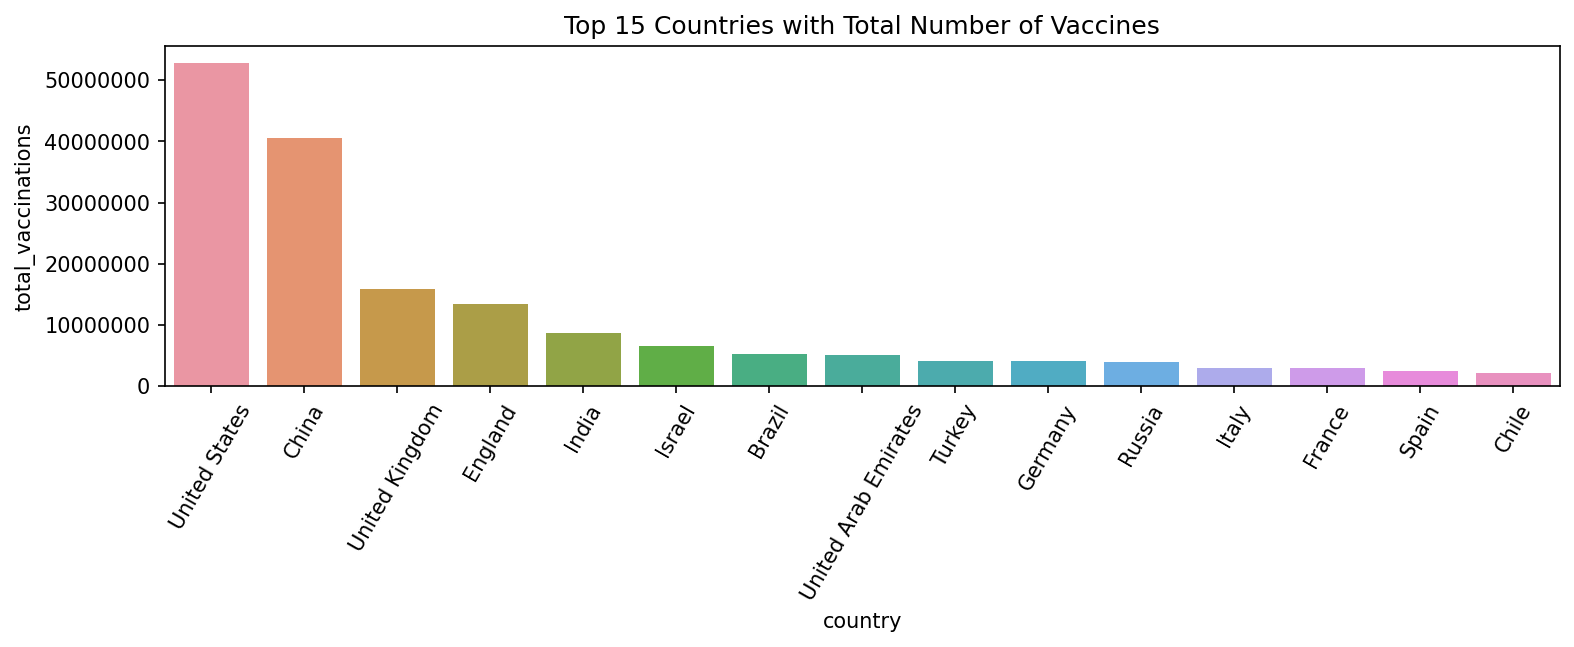

In [114]:
# plotting the total amount of vaccines given to countries
plt.figure(figsize=(12,3),dpi=150)
plt.title("Top 15 Countries with Total Number of Vaccines")
plt.xticks(rotation=60) # rotate x labels
plt.ticklabel_format(style='plain',axis='y')

# sort countries by total_vaccinations in descending order
plot_order = max_df.groupby('country')['total_vaccinations'].sum().sort_values(ascending=False).index.values

# plotting barplot of top 15 countries 
sns.barplot(data=max_df, x='country', y='total_vaccinations', order=plot_order[0:15]);

### Total number of people vaccinated by country

In [115]:
# top 25 countries with most amount of people vaccinated
max_df.groupby('country')['people_vaccinated'].sum().sort_values(ascending=False)[0:25]

country
United States           38292270.0
United Kingdom          15300151.0
England                 12862909.0
Brazil                   5076110.0
Israel                   3988763.0
Turkey                   3608148.0
Germany                  2736109.0
France                   2255597.0
Russia                   2200000.0
Chile                    2092453.0
Italy                    1756512.0
Spain                    1491517.0
Poland                   1476274.0
Scotland                 1255190.0
Bangladesh               1132711.0
Indonesia                1096095.0
Canada                    922234.0
United Arab Emirates      836568.0
Wales                     784809.0
Serbia                    783161.0
Romania                   696943.0
Mexico                    663484.0
Northern Ireland          397243.0
Greece                    386049.0
Argentina                 372181.0
Name: people_vaccinated, dtype: float64

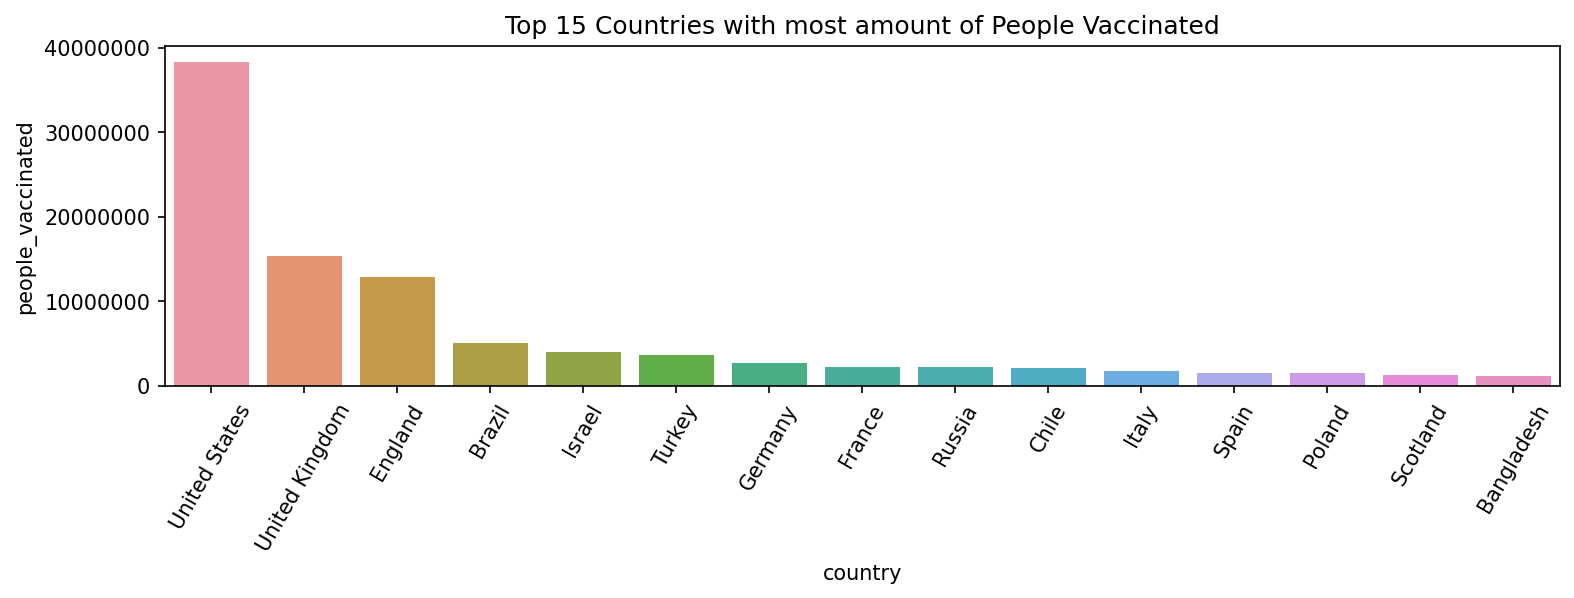

In [118]:
# plotting the total amount of people vaccinated by countries
plt.figure(figsize=(12,3),dpi=150)
plt.title("Top 15 Countries with most amount of People Vaccinated")
plt.xticks(rotation=60) # rotate x labels
plt.ticklabel_format(style='plain',axis='y')

# sort countries by people_vaccinated in descending order
plot_order = max_df.groupby('country')['people_vaccinated'].sum().sort_values(ascending=False).index.values

# plotting barplot of top 15 countries 
sns.barplot(data=max_df, x='country', y='people_vaccinated', order=plot_order[0:15]);

### Total number of people FULLY vaccinated by country

In [119]:
# top 25 countries with most amount of people vaccinated
max_df.groupby('country')['people_fully_vaccinated'].sum().sort_values(ascending=False)[0:25]

country
United States           14077440.0
Israel                   2611036.0
Russia                   1700000.0
Germany                  1410239.0
Italy                    1288023.0
Spain                    1070091.0
Poland                    645971.0
France                    640875.0
Turkey                    573879.0
United Kingdom            539630.0
England                   490722.0
Indonesia                 482625.0
Romania                   454169.0
United Arab Emirates      250000.0
Argentina                 237610.0
Brazil                    217869.0
Portugal                  197700.0
Belgium                   190324.0
Canada                    173804.0
Greece                    168696.0
Denmark                   168170.0
Serbia                    167710.0
Czechia                   163749.0
Austria                   143889.0
Hungary                   129339.0
Name: people_fully_vaccinated, dtype: float64

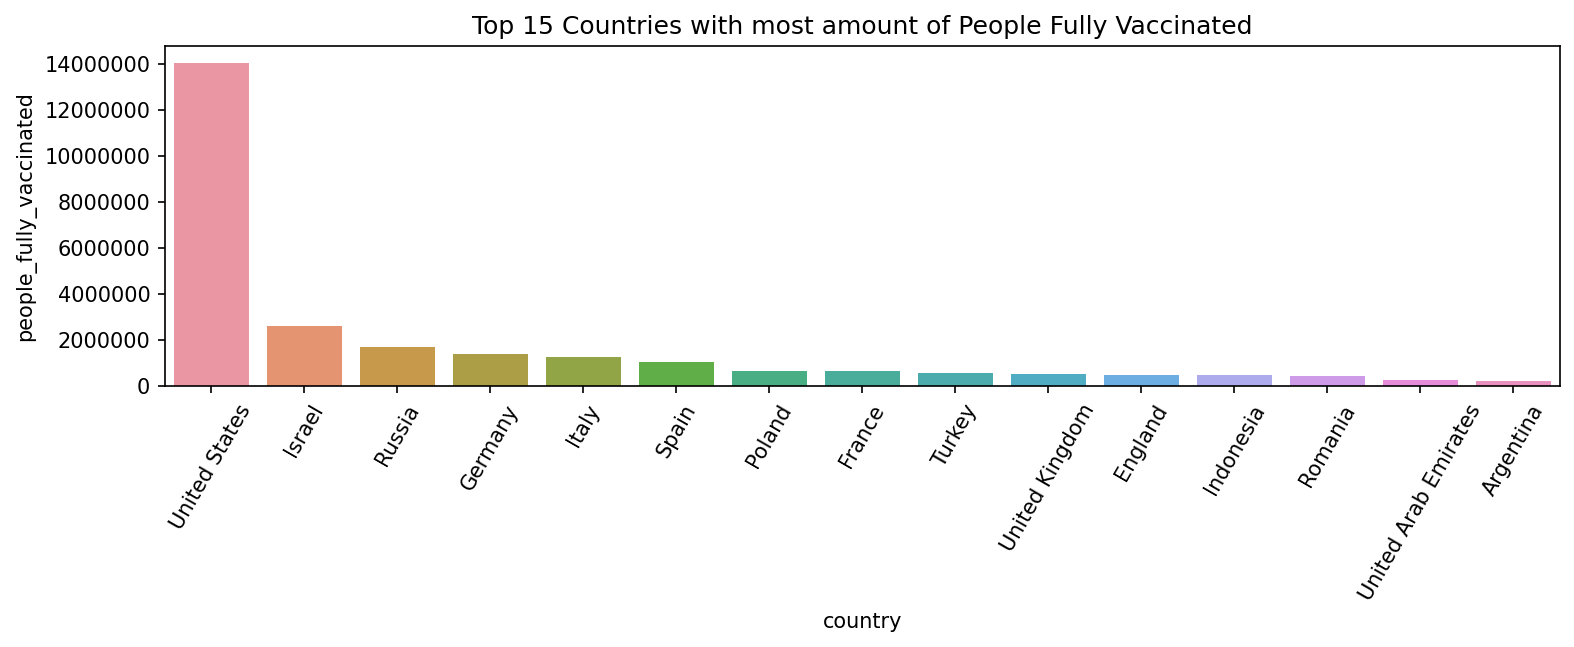

In [122]:
# plotting the total amount of people fully vaccinated by countries
plt.figure(figsize=(12,3),dpi=150)
plt.title("Top 15 Countries with most amount of People Fully Vaccinated")
plt.xticks(rotation=60) # rotate x labels
plt.ticklabel_format(style='plain',axis='y')

# sort countries by people_fully_vaccinated in descending order
plot_order = max_df.groupby('country')['people_fully_vaccinated'].sum().sort_values(ascending=False).index.values

# plotting barplot of top 15 countries 
sns.barplot(data=max_df, x='country', y='people_fully_vaccinated', order=plot_order[0:15]);

### Type of vaccines

**Number of each type of vaccine that are distributed to different countries**

In [40]:
# count number of vaccines given to countries (example: Pfizer/BioNTech is given to 23 countries)
max_df['vaccines'].value_counts()

Pfizer/BioNTech                                                                       23
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          20
Oxford/AstraZeneca, Pfizer/BioNTech                                                   10
Oxford/AstraZeneca                                                                     8
Moderna, Pfizer/BioNTech                                                               7
Sputnik V                                                                              5
Sinopharm/Beijing                                                                      3
Sinovac                                                                                2
Oxford/AstraZeneca, Sinopharm/Beijing                                                  2
Pfizer/BioNTech, Sinovac                                                               2
Oxford/AstraZeneca, Sinovac                                                            1
Oxford/AstraZeneca, P

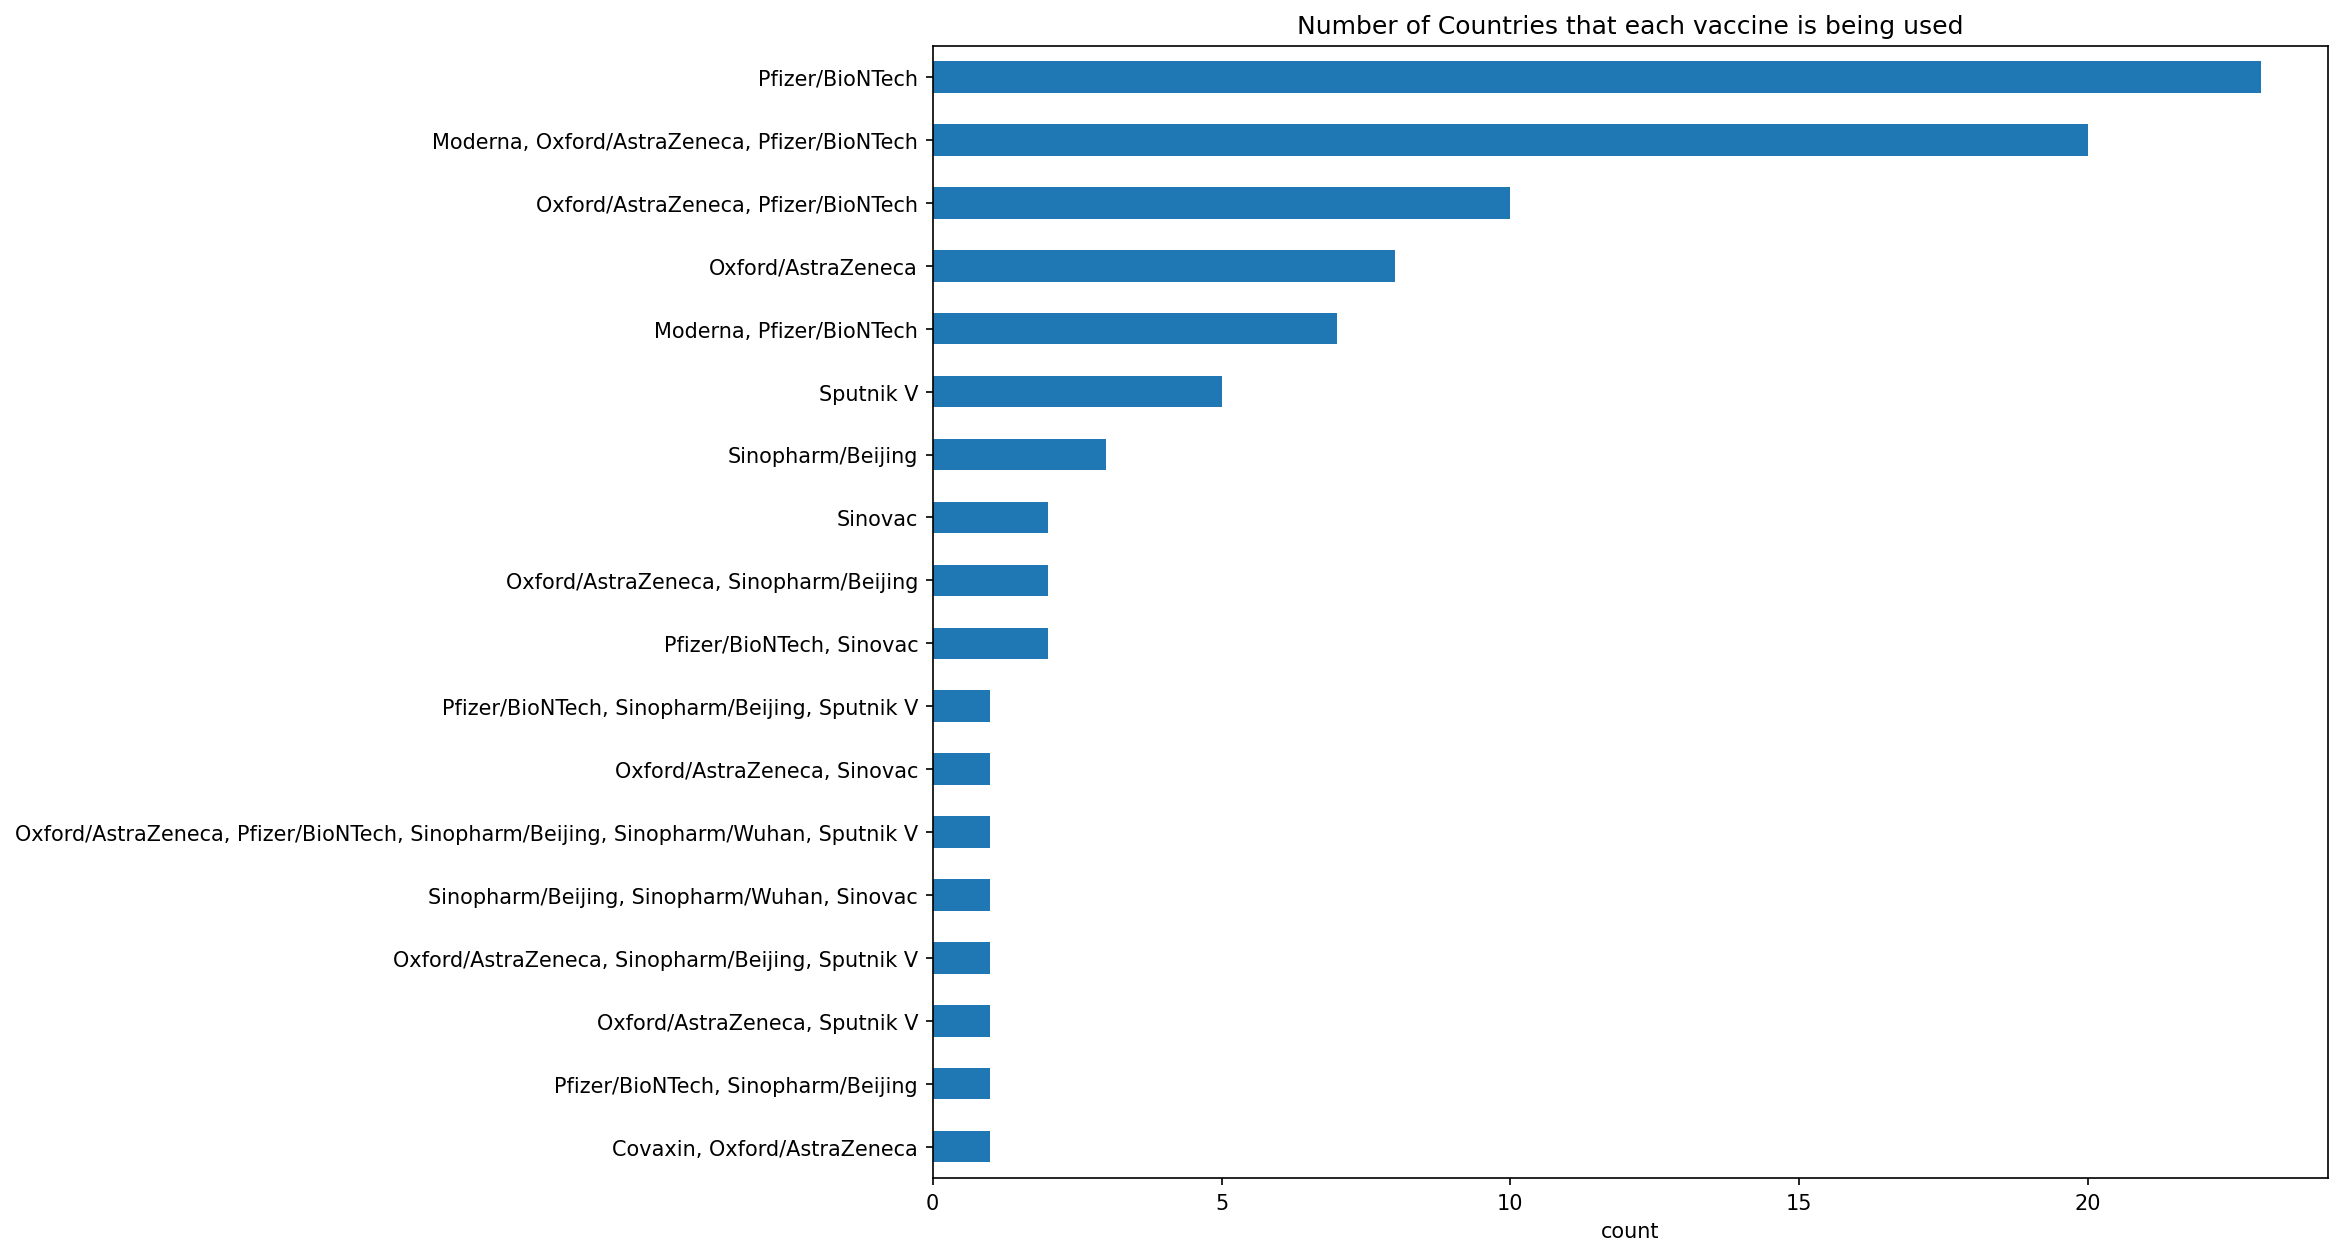

In [123]:
# plotting the count of vaccines given to countries
plt.figure(figsize=(12,10),dpi=150)
plt.title("Number of Countries that each vaccine is being used")
plt.xlabel("count")

# plotting horizontal bar
max_df['vaccines'].value_counts().sort_values().plot(kind='barh');

Pfizer/BioNtech is the most frequently used vaccine

**Proportion of each vaccine given to countries**

In [49]:
# percentage of each vaccines
round(max_df['vaccines'].value_counts()/len(max_df) * 100,1)

Pfizer/BioNTech                                                                       25.6
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          22.2
Oxford/AstraZeneca, Pfizer/BioNTech                                                   11.1
Oxford/AstraZeneca                                                                     8.9
Moderna, Pfizer/BioNTech                                                               7.8
Sputnik V                                                                              5.6
Sinopharm/Beijing                                                                      3.3
Sinovac                                                                                2.2
Oxford/AstraZeneca, Sinopharm/Beijing                                                  2.2
Pfizer/BioNTech, Sinovac                                                               2.2
Oxford/AstraZeneca, Sinovac                                                            1.1

# Cumulative vaccinations across dates

In [177]:
date_df = df[['date','daily_vaccinations_raw']].sort_values('date',ascending=True)

In [178]:
date_df = date_df.groupby('date')['daily_vaccinations_raw'].sum().reset_index()

In [179]:
date_df

,date,daily_vaccinations_raw
0,2020-12-13,0.0
1,2020-12-14,0.0
2,2020-12-15,0.0
3,2020-12-16,0.0
4,2020-12-17,0.0
...,...,...
60,2021-02-11,5217422.0
61,2021-02-12,5967829.0
62,2021-02-13,5216947.0
63,2021-02-14,3618876.0


**Total cumulative of Daily_vaccinations_raw for all countries**

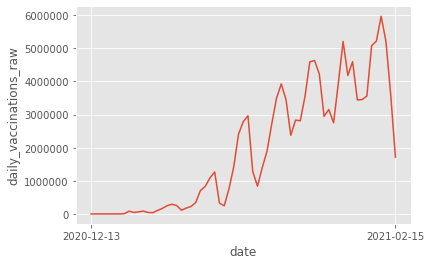

In [191]:
# minimum and maximum dates in dataframe
t = [df['date'].min(),df['date'].max()]

sns.lineplot(data=date_df,x='date',y='daily_vaccinations_raw')
plt.xticks(t,t)
plt.ticklabel_format(style='plain',axis='y');